In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import pandas_datareader as web
from datetime import date

In [2]:
df = web.DataReader('NFLX', data_source='yahoo', start='2012-01-01',end=date.today())

In [3]:
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2022-07-22,229.350006,218.440002,222.380005,220.440002,17798700.0,220.440002
2022-07-25,225.229996,216.350006,221.309998,218.509995,10935200.0,218.509995
2022-07-26,219.389999,211.639999,216.660004,213.910004,9508500.0,213.910004
2022-07-27,227.779999,214.580002,216.479996,226.750000,10508400.0,226.750000
2022-07-28,228.100006,219.669998,224.600006,226.020004,8965400.0,226.020004


In [4]:
df.reset_index(inplace=True)
df.describe()

,High,Low,Open,Close,Volume,Adj Close
count,2660.000000,2660.000000,2660.000000,2660.000000,2.660000e+03,2660.000000
mean,220.128306,213.336742,216.840395,216.830686,1.534604e+07,216.830686
std,184.381392,179.092089,181.867422,181.756388,1.693511e+07,181.756388
min,7.925714,7.544286,7.712857,7.685714,1.144000e+06,7.685714
25%,61.310000,59.991784,60.487857,60.485357,5.666175e+06,60.485357
50%,147.295006,144.504997,146.385002,146.000000,1.031065e+07,146.000000
75%,363.070000,352.247498,358.022507,357.372505,1.870575e+07,357.372505
max,700.989990,686.090027,692.349976,691.690002,2.140733e+08,691.690002


<AxesSubplot:>

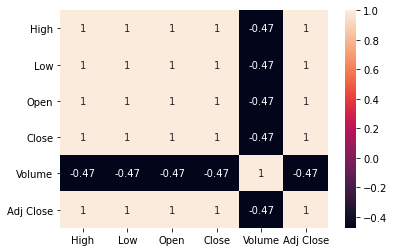

In [5]:
c=df.corr(method='pearson')
import seaborn as sn
sn.heatmap(c,annot=True)

In [6]:
import plotly.graph_objects as go
figure = go.Figure(data=[go.Candlestick(x=df["Date"],open=df["Open"],high=df["High"],low=df["Low"],close=df["Close"])])
figure.update_layout(title = "Netflix Stock Price Analysis",xaxis_rangeslider_visible=False)
figure.show()

In [7]:
netflix_df =df[['Date','High','Open','Low','Close']]
netflix_df.head()

,Date,High,Open,Low,Close
0,2012-01-03,10.388571,10.040000,10.018571,10.320000
1,2012-01-04,11.567143,10.335714,10.258571,11.492857
2,2012-01-05,11.694286,11.345714,11.040000,11.328571
3,2012-01-06,12.471429,11.302857,11.242857,12.327143
4,2012-01-09,14.235714,12.801429,12.448571,14.025714


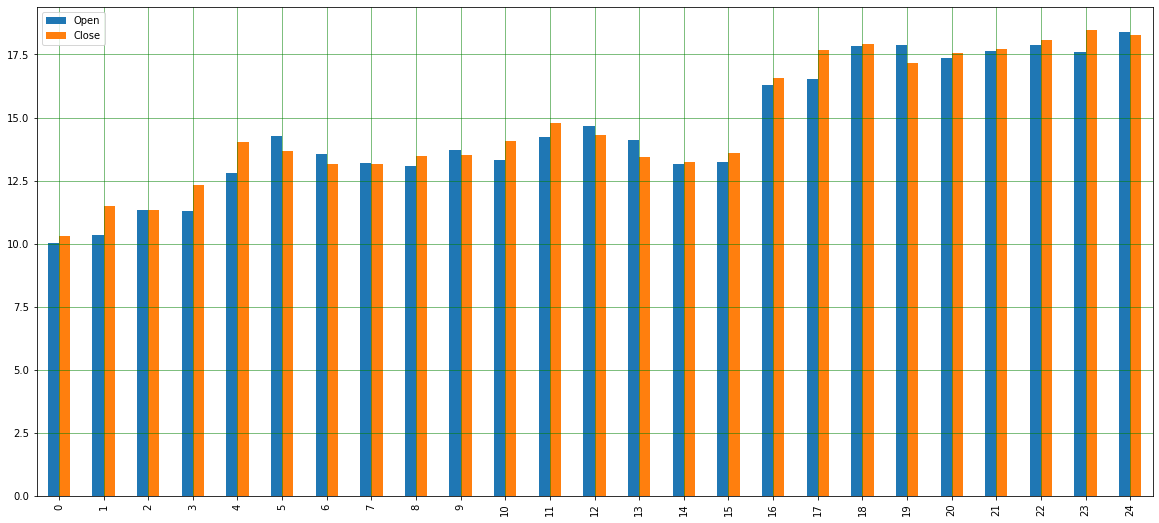

In [8]:
netflix_df[['Open','Close']].head(25).plot(kind='bar',figsize=(20,9))
plt.grid(which='major',linestyle='-',linewidth='0.5',color='green')
plt.grid(which='minor',linestyle=':',linewidth='0.5',color='black')
plt.show()

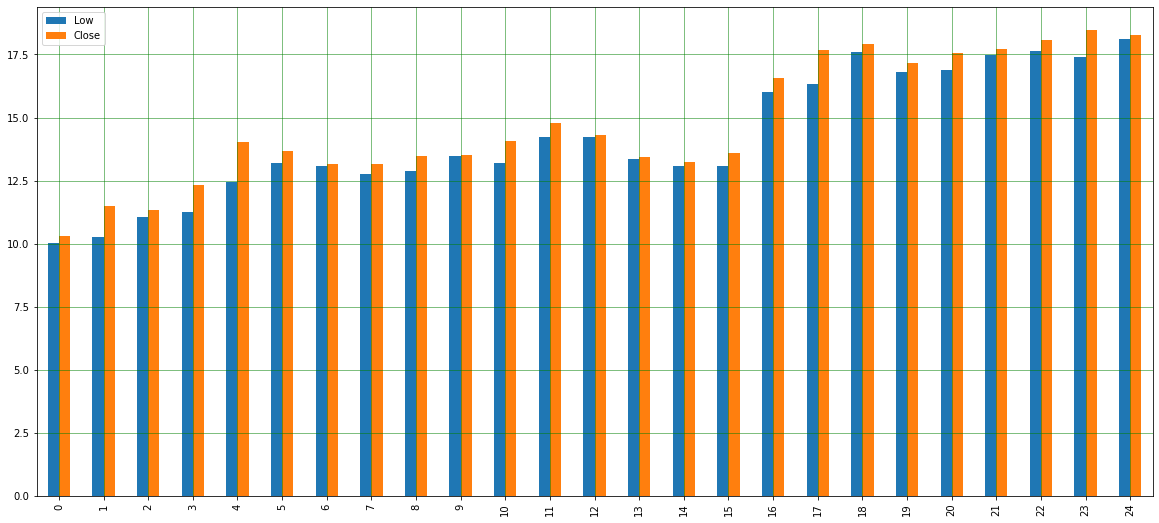

In [9]:
netflix_df[['Low','Close']].head(25).plot(kind='bar',figsize=(20,9))
plt.grid(which='major',linestyle='-',linewidth='0.5',color='green')
plt.grid(which='minor',linestyle=':',linewidth='0.5',color='black')
plt.show()

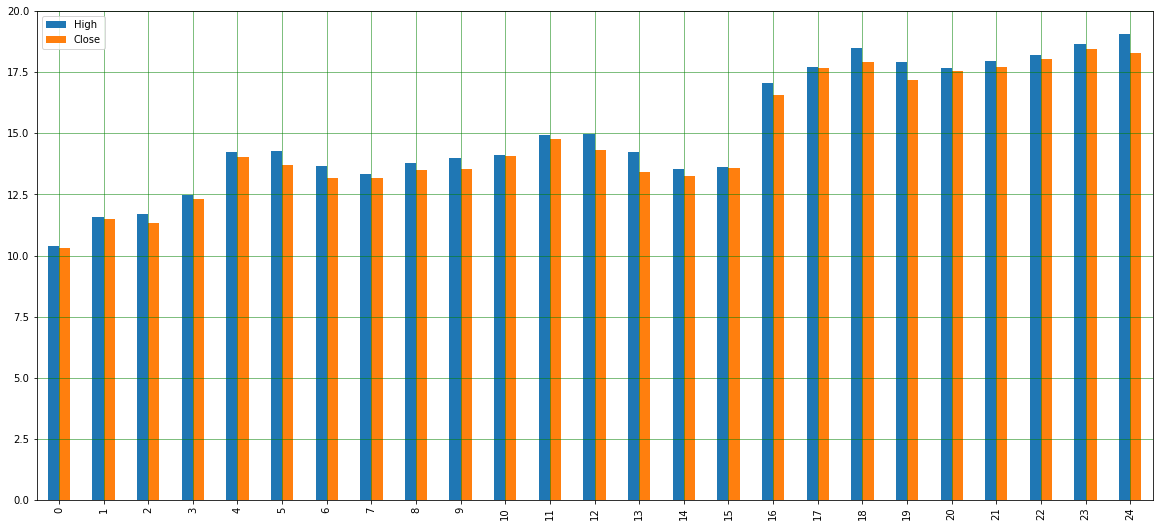

In [10]:
netflix_df[['High','Close']].head(25).plot(kind='bar',figsize=(20,9))
plt.grid(which='major',linestyle='-',linewidth='0.5',color='green')
plt.grid(which='minor',linestyle=':',linewidth='0.5',color='black')
plt.show()

In [11]:
netflix_df['Year'] =df['Date'].dt.year

<ipython-input-11-0c15356c521d>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [12]:
netflix_df.head()

,Date,High,Open,Low,Close,Year
0,2012-01-03,10.388571,10.040000,10.018571,10.320000,2012
1,2012-01-04,11.567143,10.335714,10.258571,11.492857,2012
2,2012-01-05,11.694286,11.345714,11.040000,11.328571,2012
3,2012-01-06,12.471429,11.302857,11.242857,12.327143,2012
4,2012-01-09,14.235714,12.801429,12.448571,14.025714,2012


In [13]:
netflix_df['Month'] =df['Date'].dt.month
netflix_df['Day'] =df['Date'].dt.day

In [14]:
netflix_df.drop(["Date"],axis=1,inplace=True)

In [15]:
netflix_df.head()

,High,Open,Low,Close,Year,Month,Day
0,10.388571,10.040000,10.018571,10.320000,2012,1,3
1,11.567143,10.335714,10.258571,11.492857,2012,1,4
2,11.694286,11.345714,11.040000,11.328571,2012,1,5
3,12.471429,11.302857,11.242857,12.327143,2012,1,6
4,14.235714,12.801429,12.448571,14.025714,2012,1,9


In [16]:
x_train,x_test,y_train,y_test=train_test_split(netflix_df.drop(['Close'],axis=1),netflix_df.Close,test_size=0.2)

In [17]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(2128, 6)
(532, 6)
(2128,)
(532,)


In [18]:
# lr=LinearRegression()
# lr.fit(x_train,y_train)

In [19]:
# y_pred =lr.predict(x_test)

In [20]:
# from sklearn.metrics import accuracy_score
# accuracy_score(y_test,y_pred)

In [21]:
# y_pred

In [22]:
# y_test

In [27]:
from sklearn import model_selection
from sklearn.model_selection import KFold

In [23]:
# from sklearn import model_selection
# from sklearn.model_selection import KFold
# kfold= model_selection.KFold(n_splits=20,random_state=100,shuffle=True)
# results_kfold = model_selection.cross_val_score(lr,x_test,y_test.astype('int'),cv=kfold)
# print("Accuracy: ", results_kfold.mean()*100)

In [24]:
# import pickle
# with open("StockModel",'wb')as f:
#     pickle.dump(lr,f)

In [25]:
# plot_df=pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
# plot_df.head(20).plot(kind='bar',figsize=(16,8))
# plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
# plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
# plt.show()

In [26]:
from sklearn.svm import SVR
sv=SVR(kernel='linear')
svm_model = sv.fit(x_train,y_train)
sv_y_pred=svm_model.predict(x_test)


In [29]:
sv_kfold = model_selection.KFold(n_splits=20, random_state=100,shuffle=True)
results_sv_kfolds= model_selection.cross_val_score(svm_model,x_test,y_test.astype('int'),cv=sv_kfold)
print("Accuracy: ", results_sv_kfolds.mean()*100)

Accuracy:  99.97383942717471


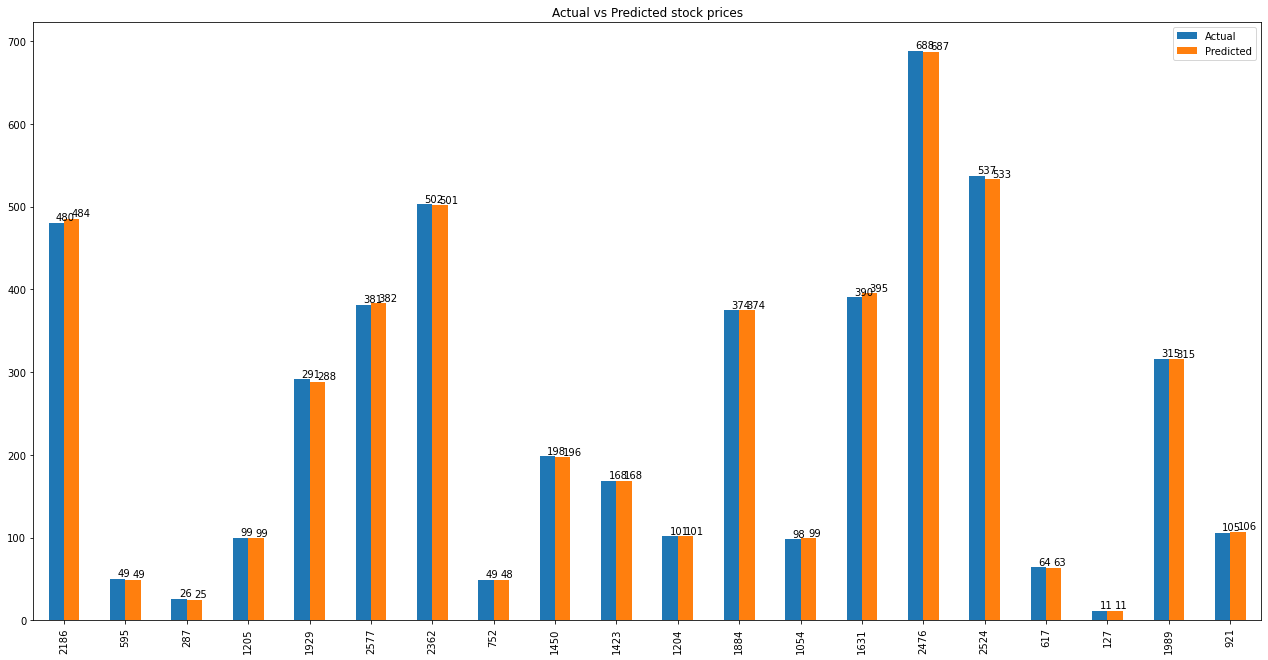

In [37]:
plot_svm_df=pd.DataFrame({'Actual': y_test,'Predicted':sv_y_pred})
a=plot_svm_df.head(20).plot(kind='bar',figsize=(22,11))
for p in a.patches:
    a.annotate(int(p.get_height()), (p.get_x()+0.12, p.get_height()+0.5), va = 'bottom', color = 'black')
# plt.xlabel()
plt.title("Actual vs Predicted stock prices")
plt.show()

In [39]:
from sklearn.metrics import mean_squared_error,r2_score
import math

In [40]:
svm_mse=math.sqrt(mean_squared_error(y_test,sv_y_pred))
print('SVM model Root mean square error',svm_mse)

SVM model Root mean square error 2.788023810231788


In [42]:
print("R2 Score value: ",r2_score(y_test,sv_y_pred))

R2 Score value:  0.9997713506791489


In [43]:
import pickle
with open("StockModel_v2",'wb')as f:
    pickle.dump(svm_model,f)